In [1]:
import pandas
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('nesarc_pds.csv', low_memory=False)

In [3]:
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['CHECK321'] = pandas.to_numeric(data['CHECK321'], errors='coerce')
data['S3AQ3B1'] = pandas.to_numeric(data['S3AQ3B1'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] = pandas.to_numeric(data['AGE'], errors='coerce')

In [4]:
pandas.to_numeric(data['CHECK321'], errors='coerce')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
43088    NaN
43089    NaN
43090    1.0
43091    1.0
43092    NaN
Name: CHECK321, Length: 43093, dtype: float64

In [5]:
#subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1=data[(data['AGE']>=18) & (data['AGE']<=25) & (data['CHECK321']==1)].copy()

In [6]:
sub1.reset_index(drop = True, inplace = True)

In [7]:
sub1.head(20)

,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,SOL12ABDEP,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP
0,2,0.0099,21,36094,3616,1528.354757,2,11,2001,1,...,0,0,0,0,0,0,0,0,0,0
1,5,0.2643,77,36094,3616,6172.249980,13,3,2002,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.985,103,41097,4107,5515.974591,27,10,2001,4,...,0,0,0,1,0,1,0,0,0,0
3,1,0.8888,122,31098,3109,4152.434010,23,9,2001,2,...,0,0,0,0,0,0,0,0,0,0
4,1,0.017,136,12042,1218,8657.814391,11,12,2001,3,...,0,0,0,0,0,1,0,0,0,0
5,1,0.0266,150,54099,5414,4002.911738,25,9,2001,3,...,0,0,0,0,0,0,0,0,0,0
6,2,0.146,155,25094,2508,1564.139226,17,8,2001,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0.0249,174,18009,1801,8812.221352,20,9,2001,2,...,0,0,0,0,0,0,0,0,0,0
8,5,0.2598,178,4013,404,3008.554718,15,8,2001,4,...,0,0,0,0,0,0,0,0,0,0
9,1,0.0345,184,48990,4826,1925.637802,1,12,2001,3,...,0,0,0,0,0,1,0,0,0,0


In [9]:
sub1['S3AQ3B1'].value_counts()

1.0    1320
3.0      91
4.0      88
6.0      71
2.0      68
5.0      65
9.0       3
Name: S3AQ3B1, dtype: int64

In [10]:
# recode missing values to python missing (NaN)
sub1['S3AQ3B1']=sub1['S3AQ3B1'].replace(9, numpy.nan)
sub1['S3AQ3C1']=sub1['S3AQ3C1'].replace(99, numpy.nan)

In [14]:
sub1['S3AQ3B1']

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
1701    1.0
1702    4.0
1703    1.0
1704    1.0
1705    6.0
Name: S3AQ3B1, Length: 1706, dtype: float64

In [15]:
#recoding values for S3AQ3B1 into a new variable, USFREQMO
recode1 = {1: 30, 2: 22, 3: 14, 4: 6, 5: 2.5, 6: 1}
sub1['USFREQMO']= sub1['S3AQ3B1'].map(recode1)

In [16]:
sub1['USFREQMO']

0       30.0
1       22.0
2       30.0
3       30.0
4       30.0
        ... 
1701    30.0
1702     6.0
1703    30.0
1704    30.0
1705     1.0
Name: USFREQMO, Length: 1706, dtype: float64

In [18]:
# contingency table of observed counts
ct1=pandas.crosstab(sub1['TAB12MDX'], sub1['USFREQMO'])
print (ct1)

USFREQMO  1.0   2.5   6.0   14.0  22.0  30.0
TAB12MDX                                    
0           64    53    69    59    41   521
1            7    12    19    32    27   799


In [19]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

USFREQMO      1.0       2.5       6.0       14.0      22.0      30.0
TAB12MDX                                                            
0         0.901408  0.815385  0.784091  0.648352  0.602941  0.394697
1         0.098592  0.184615  0.215909  0.351648  0.397059  0.605303


In [20]:
# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(165.27320708055845, 7.436364208390599e-34, 5, array([[ 33.64474457,  30.80152672,  41.70052848,  43.1221374 ,
         32.22313564, 625.50792719],
       [ 37.35525543,  34.19847328,  46.29947152,  47.8778626 ,
         35.77686436, 694.49207281]]))


In [21]:
# set variable types 
sub1["USFREQMO"] = sub1["USFREQMO"].astype('category')
sub1['TAB12MDX'] = pandas.to_numeric(sub1['TAB12MDX'], errors='coerce')

In [24]:
sub1["USFREQMO"].dtypes

CategoricalDtype(categories=[1.0, 2.5, 6.0, 14.0, 22.0, 30.0], ordered=False)

C:\Users\Hotha\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(6.799999999999997, 0.5, 'Proportion Nicotine Dependent')

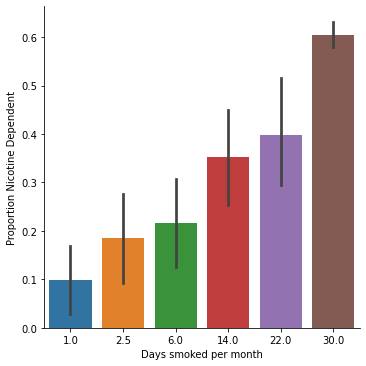

In [29]:
# graph percent with nicotine dependence within each smoking frequency group 
seaborn.catplot(x="USFREQMO", y="TAB12MDX", data=sub1, kind="bar", ci=95)
plt.xlabel('Days smoked per month')
plt.ylabel('Proportion Nicotine Dependent')

In [31]:
recode2 = {1: 1, 2.5: 2.5}
sub1['COMP1v2']= sub1['USFREQMO'].map(recode2)

In [32]:
# contingency table of observed counts
ct2=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP1v2'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

COMP1v2   1.0  2.5
TAB12MDX          
0          64   53
1           7   12
COMP1v2        1.0       2.5
TAB12MDX                    
0         0.901408  0.815385
1         0.098592  0.184615


In [33]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(1.4348930637007287, 0.2309675448977717, 1, array([[61.08088235, 55.91911765],
       [ 9.91911765,  9.08088235]]))


In [36]:
test = numpy.array([[138,83,64], [64,67,84]])
scipy.stats.chi2_contingency(test)

(22.152468645918482,
 1.547578021398957e-05,
 2,
 array([[115.14,  85.5 ,  84.36],
        [ 86.86,  64.5 ,  63.64]]))

In [41]:
scipy.stats.chi2_contingency(test.T)

(22.152468645918482,
 1.547578021398957e-05,
 2,
 array([[115.14,  86.86],
        [ 85.5 ,  64.5 ],
        [ 84.36,  63.64]]))

In [43]:
sub1

,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP,USFREQMO,COMP1v2
0,2,0.0099,21,36094,3616,1528.354757,2,11,2001,1,...,0,0,0,0,0,0,0,0,30.0,NaN
1,5,0.2643,77,36094,3616,6172.249980,13,3,2002,1,...,0,0,0,0,0,0,0,0,22.0,NaN
2,1,0.985,103,41097,4107,5515.974591,27,10,2001,4,...,0,1,0,1,0,0,0,0,30.0,NaN
3,1,0.8888,122,31098,3109,4152.434010,23,9,2001,2,...,0,0,0,0,0,0,0,0,30.0,NaN
4,1,0.017,136,12042,1218,8657.814391,11,12,2001,3,...,0,0,0,1,0,0,0,0,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2,,42941,42099,4205,1564.139226,7,2,2002,1,...,0,0,0,0,0,0,0,0,30.0,NaN
1702,5,0.0999,42990,6046,605,3486.254607,9,2,2002,4,...,0,0,0,0,0,0,0,0,6.0,NaN
1703,1,0.6602,42998,53099,5304,12918.162000,14,2,2002,4,...,0,0,0,1,0,0,0,0,30.0,NaN
1704,1,0.2641,43088,42037,4209,9663.995112,23,1,2002,1,...,0,0,0,0,0,0,0,0,30.0,NaN


In [44]:
recode3 = {1: 1, 6: 6}
sub1['COMP1v6']= sub1['USFREQMO'].map(recode3)

# contingency table of observed counts
ct3=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP1v6'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

recode4 = {1: 1, 14: 14}
sub1['COMP1v14']= sub1['USFREQMO'].map(recode4)

# contingency table of observed counts
ct4=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP1v14'])
print (ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

recode5 = {1: 1, 22: 22}
sub1['COMP1v22']= sub1['USFREQMO'].map(recode5)

# contingency table of observed counts
ct5=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP1v22'])
print (ct5)

# column percentages
colsum=ct5.sum(axis=0)
colpct=ct5/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs5= scipy.stats.chi2_contingency(ct5)
print (cs5)

recode6 = {1: 1, 30: 30}
sub1['COMP1v30']= sub1['USFREQMO'].map(recode6)

# contingency table of observed counts
ct6=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP1v30'])
print (ct6)

# column percentages
colsum=ct6.sum(axis=0)
colpct=ct6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs6= scipy.stats.chi2_contingency(ct6)
print (cs6)

recode7 = {2.5: 2.5, 6: 6}
sub1['COMP2v6']= sub1['USFREQMO'].map(recode7)

# contingency table of observed counts
ct7=pandas.crosstab(sub1['TAB12MDX'], sub1['COMP2v6'])
print (ct7)

# column percentages
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs7=scipy.stats.chi2_contingency(ct7)
print (cs7)

COMP1v6   1.0  6.0
TAB12MDX          
0          64   69
1           7   19
COMP1v6        1.0       6.0
TAB12MDX                    
0         0.901408  0.784091
1         0.098592  0.215909
chi-square value, p value, expected counts
(3.142840191220936, 0.07626090198286821, 1, array([[59.38993711, 73.61006289],
       [11.61006289, 14.38993711]]))
COMP1v14  1.0   14.0
TAB12MDX            
0           64    59
1            7    32
COMP1v14      1.0       14.0
TAB12MDX                    
0         0.901408  0.648352
1         0.098592  0.351648
chi-square value, p value, expected counts
(12.622564075461572, 0.00038111819882681824, 1, array([[53.90740741, 69.09259259],
       [17.09259259, 21.90740741]]))
COMP1v22  1.0   22.0
TAB12MDX            
0           64    41
1            7    27
COMP1v22      1.0       22.0
TAB12MDX                    
0         0.901408  0.602941
1         0.098592  0.397059
chi-square value, p value, expected counts
(15.169488833230059, 9.827865291318501e-05,